# **Training Dataset**

About the Dataset
The FER2013 dataset ( facial expression recognition) consists of 48*48 pixel grayscale face images. The images are centered and occupy an equal amount of space. This dataset consist of facial emotions of following categories:
0:angry

1:disgust

2:feat

3:happy

4:sad

5:surprise

6:natural

There are 28K training and 3K testing images in the dataset. Each image was stored as 48×48 pixel. The pure dataset consists of image pixels (48×48=2304 values), emotion of each image and usage type (as train or test instance).

# **Import**

In [ ]:
import tensorflow as tf

import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from keras.layers import Dense, Activation, Dropout, Flatten

from keras.preprocessing       import image
from keras.preprocessing.image import ImageDataGenerator

import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Define variables
num_classes = 7
classes     = ['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral']
batch_size  = 256
epochs      = 10

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
# with open('/content/drive/My Drive/glove.6B.50d.txt', encoding='utf-8') as f:
# Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
# Read data
with open("/content/drive/My Drive/data/fer2013.csv") as f:
    content = f.readlines()

lines = np.array(content)

num_of_instances = lines.size
print("Number of instances: ", num_of_instances)
print("instance length (48 * 48 = 2304): ", len(lines[1].split(",")[1].split(" ")))

number of instances:  35888
instance length:  2304


# **Split dataset into training set, validation set and test set**

In [ ]:
# Trainset, val_test and test set
x_train, y_train = [], []
x_val, y_val     = [], []
x_test, y_test   = [], []

# Training, validation and test set data
for i in range(1, num_of_instances):
    try:
        emotion, img, usage = lines[i].split(",")
        img = np.array(img.split(" "), dtype="uint8")
        img = img.reshape((48, 48))
        
        emotion = keras.utils.to_categorical(emotion, num_classes)
    
        if "Training" in usage:
            y_train.append(emotion)
            x_train.append(img)
        elif "PrivateTest" in usage:
            y_val.append(emotion)
            x_val.append(img)
        else:
            y_test.append(emotion)
            x_test.append(img)

    except:
      print("",end="")


# Data transformation
x_train = np.array(x_train, 'float32')
y_train = np.array(y_train, 'float32')
x_val   = np.array(x_val, 'float32')
y_val   = np.array(y_val, 'float32')

x_test = np.array(x_test, 'float32')
y_test = np.array(y_test, 'float32')

x_train /= 255                       # normalize pixels data -> between [0, 1]
x_val   /= 255
x_test  /= 255

x_train = x_train.reshape(x_train.shape[0], 48, 48, 1)
x_train = x_train.astype('float32')
x_val   = x_val.reshape(x_val.shape[0], 48, 48, 1)
x_val   = x_val.astype('float32')

x_test = x_test.reshape(x_test.shape[0], 48, 48, 1)
x_test = x_test.astype('float32')

print(x_train.shape[0], 'train samples')
print('X_train shape:')
print(x_train.shape)
print()
print(x_val.shape[0], 'Val samples')
print(x_test.shape[0], 'test samples')

28709 train samples
X_train shape:
(28709, 48, 48, 1)

3589 Val samples
3589 test samples


## **Plot some samples**

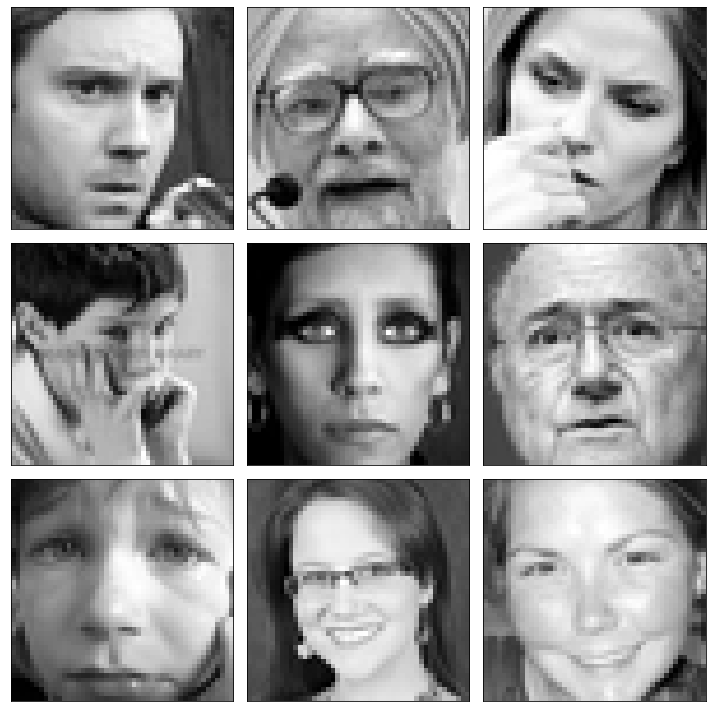

In [ ]:
def plot_img(start, end, X):
    """
    The function is used to plot some pictures
    """
    fig = plt.figure(figsize=(10,10))
    for i in range(start, end):
        input_img = X[i:(i+1),:,:,:]

        ax = fig.add_subplot(3,3,i+1)
        ax.imshow(input_img[0,:,:,0], cmap=plt.cm.gray)
        
        plt.xticks(np.array([]))
        plt.yticks(np.array([]))
        plt.tight_layout()
    plt.show()

# Plot
plot_img(0, 9, x_train)

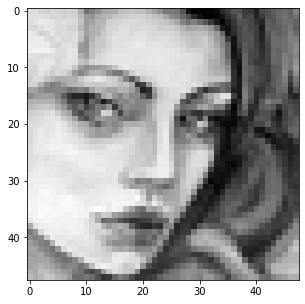

(3589, 48, 48, 1)
(48, 48, 1)


In [ ]:
# Plot a single image
plt.figure(figsize=(5,5))
input_img = x_test[7,:,:,:] 
plt.imshow(input_img[:,:,0], cmap='gray')
plt.show()

print (x_test.shape)
print (input_img.shape)

## **Build model**

In [ ]:
# Build CNN structure
model = Sequential()

# First convolution layer
model.add(Conv2D(64, (5, 5), activation='relu', input_shape=(48,48,1)))
model.add(MaxPooling2D(pool_size=(5,5), strides=(2, 2)))

# 2nd convolution layer
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(AveragePooling2D(pool_size=(3,3), strides=(2, 2)))

# 3rd convolution layer
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(AveragePooling2D(pool_size=(3,3), strides=(2, 2)))

# Flatten layer
model.add(Flatten())

# Dense (fully connected) neural networks
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))

# Last dense layer for classifying using softmax
model.add(Dense(num_classes, activation='softmax'))


# Batch process for data augementation
gen = ImageDataGenerator()
train_generator = gen.flow(x_train, y_train, batch_size=batch_size)

# Compile
model.compile(loss='categorical_crossentropy'
    , optimizer=keras.optimizers.Adam()
    , metrics=['accuracy']
)

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 44, 44, 64)        1664      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 20, 20, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 18, 18, 64)        36928     
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
average_pooling2d_3 (Average (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 5, 5, 128)         73856     
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 3, 3, 128)        

# **Train the model**

In [ ]:
training = True

if training:
  #model.fit_generator(x_train, y_train, epochs=epochs) #train for all trainset
  history = model.fit_generator(train_generator, steps_per_epoch=batch_size, epochs=epochs,
                      validation_data=(x_val, y_val),
                      shuffle=True, verbose=1)
else:

  # Load the trained model
  model = keras.models.load_model('/content/drive/My Drive/data/facial_expression_model.h5')

Epoch 1/5
256/256 [==============================] - 426s 2s/step - loss: 1.7717 - accuracy: 0.2704 - val_loss: 1.6578 - val_accuracy: 0.3391
Epoch 2/5
256/256 [==============================] - 423s 2s/step - loss: 1.5093 - accuracy: 0.4055 - val_loss: 1.4029 - val_accuracy: 0.4519
Epoch 3/5
256/256 [==============================] - 425s 2s/step - loss: 1.3368 - accuracy: 0.4869 - val_loss: 1.2799 - val_accuracy: 0.5096
Epoch 4/5
256/256 [==============================] - 427s 2s/step - loss: 1.2296 - accuracy: 0.5325 - val_loss: 1.2301 - val_accuracy: 0.5319
Epoch 5/5
256/256 [==============================] - 424s 2s/step - loss: 1.1474 - accuracy: 0.5636 - val_loss: 1.1629 - val_accuracy: 0.5578


In [ ]:
# Save the model
model.save("/content/drive/My Drive/data/facial_expression_model.h5")

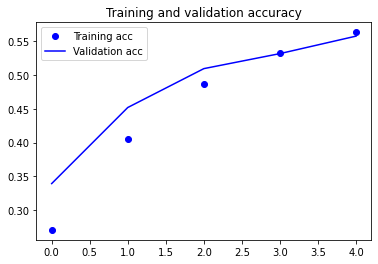

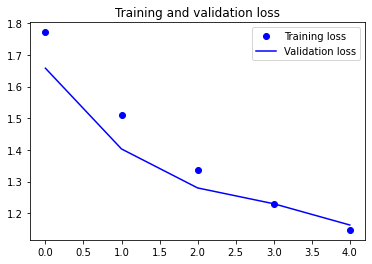

In [ ]:
# History - Accuracy
acc     = history.history['accuracy']
val_acc = history.history['val_accuracy']

# History - Loss
loss     = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# **Evaluation**

In [ ]:
# Evaluation
score = model.evaluate(x_test, y_test)
print('Test loss:', score[0])
print('Test accuracy:', 100.*score[1])

3589/3589 [==============================] - 6s 2ms/step
Test loss: 1.209254082546622
Test accuracy: 54.109781980514526


In [ ]:
# For drawing bar chart
def emotion_analysis(emotions):
    y_pos = np.arange(len(classes))
    
    plt.bar(y_pos, emotions, align='center', alpha=0.5)
    plt.xticks(y_pos, classes)
    plt.ylabel('percentage')
    plt.title('emotion')
    
    plt.show()

In [ ]:
monitor_testset_results = True

if monitor_testset_results:
	# Predictions for test set
	predictions = model.predict(x_test)

	index = 0
	for i in predictions:
		if index < 30 and index >= 20:

			testing_img = np.array(x_test[index], 'float32')
			testing_img = testing_img.reshape([48, 48]);
			
			plt.gray()
			plt.imshow(testing_img)
			plt.show()
			
			emotion_analysis(i)
			print("----------------------------------------------")
		index = index + 1

# **Make prediction**

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


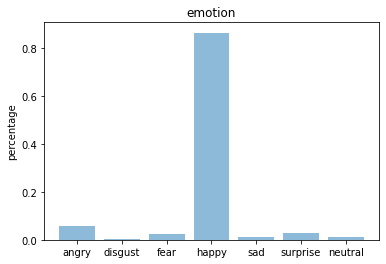

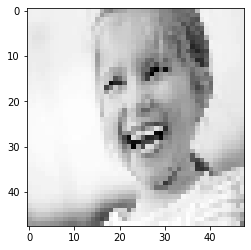

In [ ]:
# Prediction for an image

img = image.load_img("/content/drive/My Drive/data/happy.jpeg", grayscale=True, target_size=(48, 48))

x = image.img_to_array(img)
x = np.expand_dims(x, axis = 0)

x /= 255

custom = model.predict(x)
emotion_analysis(custom[0])

x = np.array(x, 'float32')
x = x.reshape([48, 48]);

plt.gray()
plt.imshow(x)
plt.show()